In [ ]:
# model training
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, f1_score
data = pd.read_csv("/content/creditcard.csv")

df = pd.DataFrame(data)

# print(df.head())

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

scaler = StandardScaler()

X = df.drop("Class", axis=1)
Y = df["Class"]

X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y, test_size=0.25, stratify=Y)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)





Recall: 0.8
Precision: 0.8421052631578947
F1 Score: 0.8205128205128205


/tmp/ipython-input-1926750132.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


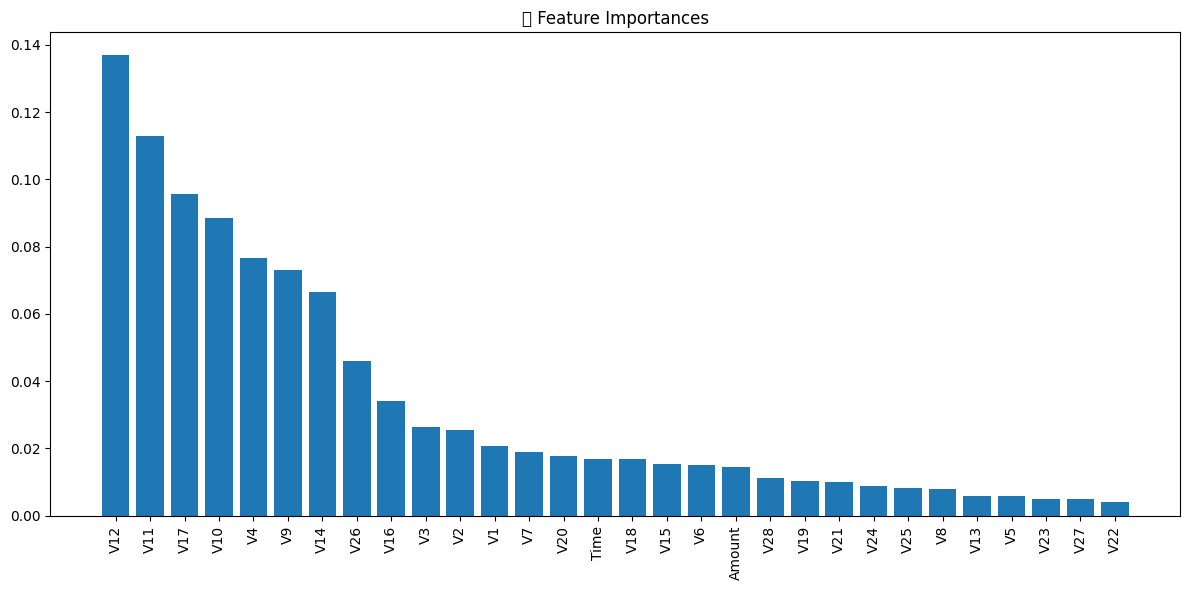

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume you already have your trained Random Forest model
importances = rfc.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12,6))
plt.title("🔍 Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Now compare Roc or F1 after removing the least important features and train again.